Bitcoin OTC trust weighted signed network

1)Identify and load a network dataset that has some categorical information available for each node

In [3]:
import networkx as net
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from operator import itemgetter
from tabulate import tabulate

In [4]:
data = (r"C:\Users\JGARCIA\Desktop\soc-sign-bitcoinotc.csv")

In [5]:
bitcoin_data = pd.read_csv(data, header=None, names=['Member#1', 'Member#2', 'Weight', 'Time'])
bitcoin_data = bitcoin_data.drop(columns = ['Time'])#not needed for this analysis
bitcoin_data.head(10)

,Member#1,Member#2,Weight
0,6,2,4
1,6,5,2
2,1,15,1
3,4,3,7
4,13,16,8
5,13,10,8
6,7,5,1
7,2,21,5
8,2,20,5
9,21,2,5


In [6]:
bitcoin_data.describe()

,Member#1,Member#2,Weight
count,35592.000000,35592.000000,35592.000000
mean,2353.847269,2417.478254,1.012025
std,1605.771178,1658.232170,3.562094
min,1.000000,1.000000,-10.000000
25%,988.000000,978.000000,1.000000
50%,2125.000000,2178.000000,1.000000
75%,3722.000000,3804.000000,2.000000
max,6000.000000,6005.000000,10.000000


In [7]:
bitcoin_data_format = net.from_pandas_edgelist(bitcoin_data, source ='Member#1', target ='Member#2', edge_attr = 'Weight')
bitcoin_data_format.number_of_edges()

21492

In [8]:
bitcoin_data_format.number_of_nodes()

5881

C:\Users\JGARCIA\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):
C:\Users\JGARCIA\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['times_new_roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


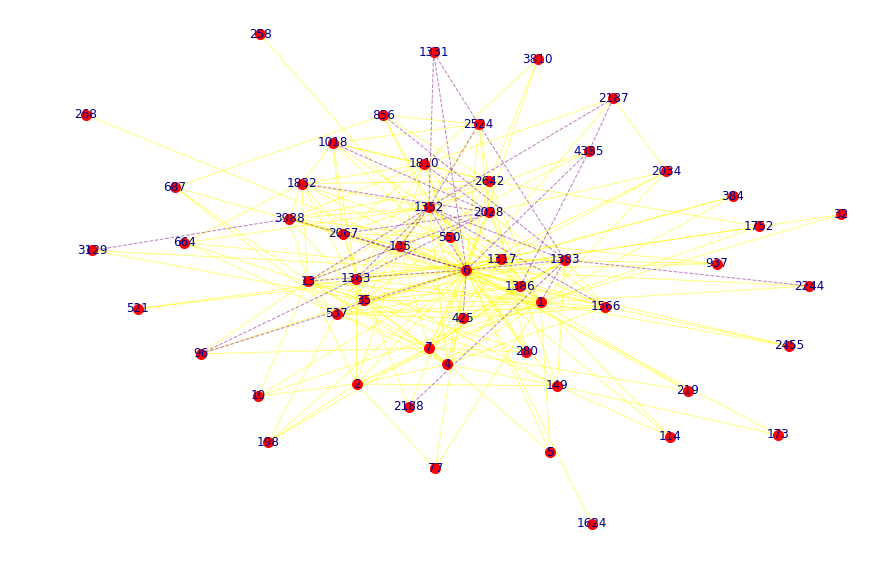

In [9]:

user_21  = bitcoin_data_format.subgraph([6, 2,  5,  10,  4,  32,  7,  35,  114,  77,  173,  258,  268,  219,  198,  1,  664,  937,  384,  521,  280,  687,  1386,  537,  1317,  1566,  149,  2034,  2455,  1383,  425,  1810,  2028,  1363,  1018,  1832,  1624,  550,  1331,  2642,  856,  2188,  2187,  1752,3810,3129,2244,135,13, 2067,61318,4385,2524,3988,1352,96])
epos=[(u,v) for (u,v,d) in user_21.edges(data=True) if d['Weight'] >=0]
eneg=[(u,v) for (u,v,d) in user_21.edges(data=True) if d['Weight'] <0]
pos=net.spring_layout(user_21)
plt.figure(figsize=(15,10))
net.draw_networkx_nodes(user_21,pos,node_color='r',node_size=100)
net.draw_networkx_edges(user_21,pos,edgelist=epos,
                    width=1,alpha=0.5,edge_color='yellow',style='solid')
net.draw_networkx_edges(user_21,pos,edgelist=eneg,
                    width=1,alpha=0.5,edge_color='purple',style='dashed')
net.draw_networkx_labels(user_21,pos,font_color='darkblue',font_size=12,font_family='times_new_roman')

plt.axis('off')
plt.show()

In [10]:
print("Nodes in the user subgraph: " + str (user_21.number_of_nodes()))
print("Edges in the user subgraph: " + str (user_21.number_of_edges()))

Nodes in the user subgraph: 55
Edges in the user subgraph: 253


In [11]:
deg = net.degree(bitcoin_data_format)
print("The degree of node 21 is "+str(deg[21]))
type(deg)

The degree of node 21 is 28


networkx.classes.reportviews.DegreeView

In [12]:
print("The center of the user_21 network is "+str(net.center(user_21)) + "\n")

The center of the user_21 network is [6]



2)For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality
3)Compare your centrality measures across your categorical groups.

In [13]:
deg_list = list(deg)
print('The maximum degree in the network is: '+str(max(deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the newowrk is: ' +str(min(deg_list,key=itemgetter(1))[1]))

The maximum degree in the network is: 795
The minimum degree in the newowrk is: 1


In [14]:
iso_list = net.isolates(bitcoin_data_format)
print('The number of isolates in the network are: '+ str(len(list(iso_list))))

The number of isolates in the network are: 0


In [15]:
sorted_deg_list = sorted(deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_deg_list[0:10], headers = ['UserID', 'Degree'],tablefmt='simple'))

  UserID    Degree
--------  --------
      35       795
    1810       439
    2642       438
    2125       436
    2028       326
     905       320
    4172       293
       1       264
       7       239
    3129       217


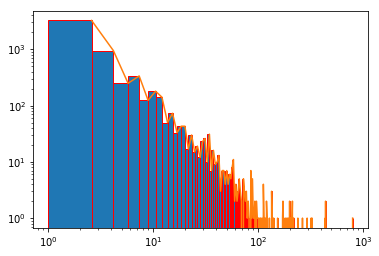

In [16]:
plt.close()
degrees_only = [n[1] for n in sorted_deg_list]
h = plt.hist(degrees_only, 500, ec="red")
plt.loglog(h[1][1:],h[0])
plt.show()

In [17]:
print('The 50th top user by degree centrality has a degree of: ' + str(sorted_deg_list[51][1])) 

The 50th top user by degree centrality has a degree of: 92


In [18]:
close = net.closeness_centrality(bitcoin_data_format)

In [19]:
sorted_close = sorted(close.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_close[0:10], headers = ['UserID', 'Closeness'],tablefmt='simple'))

  UserID    Closeness
--------  -----------
     905     0.436024
       1     0.433031
      35     0.427479
    2388     0.418964
    1810     0.410954
    2642     0.410465
      13     0.410092
    2296     0.407642
    2028     0.407302
    2125     0.406963


In [20]:
between = net.betweenness_centrality(bitcoin_data_format)

In [21]:
sorted_between = sorted(between.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_between[0:10], headers = ['UserID', 'Betweenness'],tablefmt='simple'))

  UserID    Betweenness
--------  -------------
      35      0.193143
    2125      0.0777387
    2642      0.0647239
    1810      0.061622
       1      0.0528104
     905      0.0525848
    3129      0.0519641
    4172      0.0496612
    2028      0.0444701
       7      0.039281


In [22]:
eigen = net.eigenvector_centrality(bitcoin_data_format)

In [23]:
sorted_eigen = sorted(eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_eigen[0:10], headers = ['UserID', 'Eigen Vector'],tablefmt='simple'))

  UserID    Eigen Vector
--------  --------------
     905        0.188653
    1810        0.182641
    2642        0.175077
    2028        0.154839
    2125        0.148704
      35        0.146066
       1        0.14085
    1334        0.135365
    4172        0.135335
    2388        0.133787


In [24]:
bitcoin_positive = bitcoin_data.loc[bitcoin_data['Weight'] > 0]
print(bitcoin_positive.head())

   Member#1  Member#2  Weight
0         6         2       4
1         6         5       2
2         1        15       1
3         4         3       7
4        13        16       8


In [27]:
bitcoin_positive_net = net.from_pandas_edgelist(bitcoin_positive, source ='Member#1', target ='Member#2', edge_attr = 'Weight')
print("Number of Edges in the positive network: "+str(bitcoin_positive_net.number_of_edges()))
print("Number of Node in the positive network: "+str(bitcoin_positive_net.number_of_nodes()))

Number of Edges in the positive network: 18591
Number of Node in the positive network: 5573


In [29]:
positive_degree = net.degree(bitcoin_positive_net)
positive_degree_list = list(positive_degree)
print('The maximum degree in the positive network is: '+str(max(positive_degree_list,key=itemgetter(1))[1]))
print('The minimum degree in the positive network is: ' +str(min(positive_degree_list,key=itemgetter(1))[1]))
sorted_positive_degree_list = sorted(positive_degree_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_positive_degree_list[0:10], headers = ['User#', 'Degree'],tablefmt='simple'))
positive_eigen = net.eigenvector_centrality(bitcoin_positive_net)
sorted_positive_eigen = sorted(positive_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_positive_eigen[0:10], headers = ['User#', 'Eigen Vector'],tablefmt='simple'))

The maximum degree in the positive network is: 788
The minimum degree in the positive network is: 1
  User#    Degree
-------  --------
     35       788
   2642       433
   1810       296
   2028       291
    905       270
      1       259
      7       236
   4172       220
   3129       216
   2125       213
  User#    Eigen Vector
-------  --------------
   2642        0.193922
    905        0.186048
     35        0.171816
   1810        0.156171
      1        0.152799
   2028        0.143714
   4291        0.140313
   1334        0.14026
   4172        0.13759
   2125        0.129247


In [30]:
bitcoin_high_positive = bitcoin_data.loc[bitcoin_data['Weight'] >= 5]
bitcoin_high_positive_network = net.from_pandas_edgelist(bitcoin_high_positive, source ='Member#1', target ='Member#2', edge_attr = 'Weight')
print("Number of Edges in the high positive network: "+str(bitcoin_high_positive_network.number_of_edges()))
print("Number of Node in the high positive network: "+str(bitcoin_high_positive_network.number_of_nodes()))

Number of Edges in the high positive network: 2218
Number of Node in the high positive network: 1588


In [33]:
hi_deg = net.degree(bitcoin_high_positive_network)
hi_deg_list = list(hi_deg)
print('The maximum degree in the high positive network is: '+str(max(hi_deg_list,key=itemgetter(1))[1]))
print('The minimum degree in the high positive network is: ' +str(min(hi_deg_list,key=itemgetter(1))[1]))
sorted_hi_deg_list = sorted(hi_deg_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_hi_deg_list[0:10], headers = ['User#', 'Degree'],tablefmt='simple'))
hi_eigen = net.eigenvector_centrality(bitcoin_high_positive_network)
sorted_hi_eigen = sorted(hi_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_hi_eigen[0:10], headers = ['User#', 'Eigen Vector'],tablefmt='simple'))

The maximum degree in the high positive network is: 77
The minimum degree in the high positive network is: 1
  User#    Degree
-------  --------
      1        77
   2642        71
     35        57
      7        50
   2028        49
    257        48
   4172        48
     25        43
   1018        37
   1810        35
  User#    Eigen Vector
-------  --------------
      1        0.388374
      7        0.233202
   1386        0.227948
   1201        0.199311
   1383        0.198189
   1317        0.182742
   1396        0.176229
    905        0.168946
      4        0.159105
   1565        0.158056


In [35]:
bitcoin_low_positive = bitcoin_data.loc[(bitcoin_data['Weight'] > 0) & (bitcoin_data['Weight'] < 5)]
bitcoin_low_positive_network = net.from_pandas_edgelist(bitcoin_low_positive, source ='Member#1', target ='Member#2', edge_attr = 'Weight')
print("Number of Edges in the low positive network: "+str(bitcoin_low_positive_network.number_of_edges()))
print("Number of Node in the low positive network: "+str(bitcoin_low_positive_network.number_of_nodes()))

Number of Edges in the low positive network: 17223
Number of Node in the low positive network: 5399


In [39]:
low_degree = net.degree(bitcoin_low_positive_network)
low_degree_list = list(low_degree)
print('The maximum degree is: '+str(max(low_degree_list,key=itemgetter(1))[1]))
print('The minimum degree is: ' +str(min(low_degree_list,key=itemgetter(1))[1]))
sorted_lo_deg_list = sorted(low_degree_list, key=lambda tup: tup[1], reverse=True)
print(tabulate(sorted_lo_deg_list[0:10], headers = ['User#', 'Degree'],tablefmt='simple'))
lo_eigen = net.eigenvector_centrality(bitcoin_low_positive_network)
sorted_lo_eigen = sorted(lo_eigen.items(), key=itemgetter(1), reverse=True)
print(tabulate(sorted_lo_eigen[0:10], headers = ['User#', 'Eigen Vector'],tablefmt='simple'))

The maximum degree is: 773
The minimum degree is: 1
  User#    Degree
-------  --------
     35       773
   2642       400
   1810       277
   2028       258
    905       253
      7       216
   3129       215
      1       208
   4197       208
   2125       205
  User#    Eigen Vector
-------  --------------
     35        0.203776
   2642        0.184791
    905        0.179288
   1810        0.155505
   3988        0.13352
   1334        0.133315
   2125        0.131864
   4291        0.131021
   4197        0.129294
   2388        0.129068


In [40]:
btc_ntr = bitcoin_data.loc[bitcoin_data['Weight'] == 0]
print(btc_ntr.head())

Empty DataFrame
Columns: [Member#1, Member#2, Weight]
Index: []


In [41]:
btc_neg = bitcoin_data.loc[bitcoin_data['Weight'] <0]
print(btc_neg.head())

     Member#1  Member#2  Weight
596       104       179      -1
597       200       179      -1
598       149       179      -1
632         7       179      -1
646       135       179      -1


In [42]:
btc_neg_net = net.from_pandas_edgelist(btc_neg, source ='Member#1', target ='Member#2', edge_attr = 'Weight')
print("Number of Edges in the negative network: "+str(btc_neg_net.number_of_edges()))
print("Number of Node in the negative network: "+str(btc_neg_net.number_of_nodes()))

Number of Edges in the negative network: 3259
Number of Node in the negative network: 1606


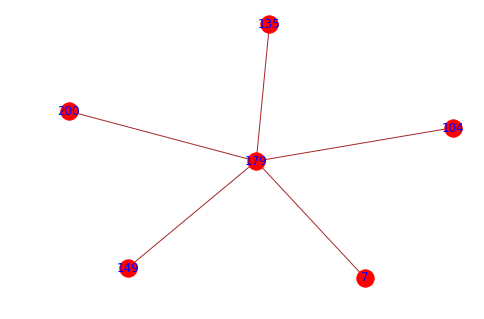

In [43]:
user179 = net.ego_graph(btc_neg_net,179)
net.draw(user179,with_labels = True,edge_color='brown',font_color='blue',font_size=12,font_family='times_new_roman')
plt.show()

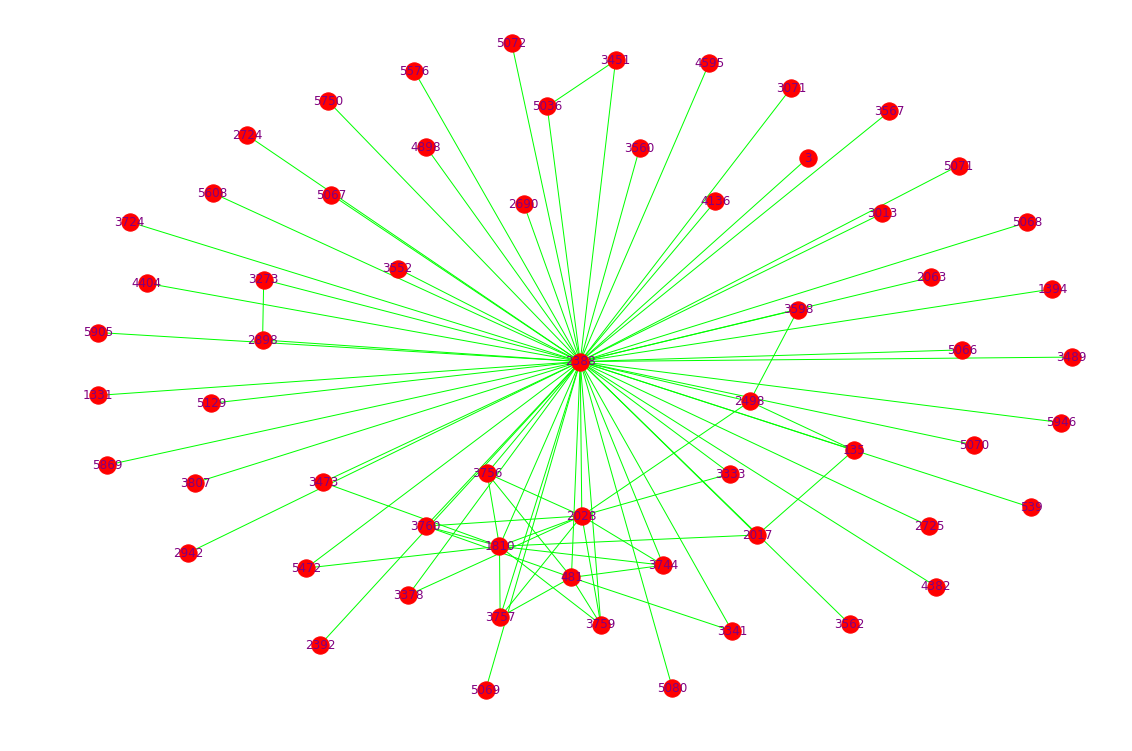

In [44]:
user2388 = net.ego_graph(btc_neg_net,2388)
plt.figure(figsize=(15,10))
net.draw(user2388,with_labels = True,edge_color='lime',font_color='purple',font_size=12,font_family='times_new_roman')
plt.show()

In [45]:
print("The edges in user2388 network are: " + str(sorted(user2388.edges())))

The edges in user2388 network are: [(3, 2388), (135, 2017), (135, 2388), (135, 2498), (539, 2388), (1331, 2388), (1810, 2017), (1810, 2028), (1810, 2388), (1810, 3744), (1810, 3756), (1810, 3757), (1810, 3759), (1810, 3760), (1810, 5472), (2063, 2388), (2388, 481), (2388, 1394), (2388, 2017), (2388, 2028), (2388, 2392), (2388, 2942), (2388, 3071), (2388, 3451), (2388, 3552), (2388, 3560), (2388, 3562), (2388, 3567), (2388, 3807), (2388, 4595), (2388, 5080), (2388, 5472), (2388, 5608), (2388, 5750), (2388, 5869), (2498, 2028), (2498, 2388), (2690, 2388), (2724, 2388), (2725, 2388), (2898, 2388), (3013, 2388), (3273, 2388), (3273, 2898), (3333, 2028), (3333, 2388), (3341, 481), (3341, 2388), (3378, 2028), (3378, 2388), (3473, 1810), (3473, 2388), (3489, 2388), (3598, 2388), (3598, 2498), (3724, 2388), (3744, 481), (3744, 2028), (3744, 2388), (3756, 481), (3756, 2028), (3756, 2388), (3757, 481), (3757, 2028), (3757, 2388), (3759, 481), (3759, 2028), (3759, 2388), (3760, 481), (3760, 2028)